# <b>1 <span style='color:#c72b2ed4'>|</span> Importing and Preprocessing Data Data</b>


In [1]:
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = '/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx'
df = pd.read_excel(file, sheet_name='Pumpkin_Seeds_Dataset',engine='openpyxl')
df.head(15)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


In [3]:
df.tail(15)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2485,71141,1126.925,486.4598,187.0650,71768,300.9643,0.9231,0.9913,0.5851,0.7039,2.6005,0.6187,Ürgüp Sivrisi
2486,54426,903.456,363.7880,190.8668,54880,263.2439,0.8513,0.9917,0.6485,0.8379,1.9060,0.7236,Ürgüp Sivrisi
2487,87088,1193.770,494.4742,225.1701,87924,332.9923,0.8903,0.9905,0.7051,0.7679,2.1960,0.6734,Ürgüp Sivrisi
2488,60387,1016.508,433.2884,178.2834,60938,277.2853,0.9114,0.9910,0.6202,0.7344,2.4303,0.6400,Ürgüp Sivrisi
2489,92886,1211.852,501.5779,237.1213,93503,343.8984,0.8812,0.9934,0.6180,0.7948,2.1153,0.6856,Ürgüp Sivrisi
2490,51555,934.911,401.8321,164.7038,52013,256.2067,0.9121,0.9912,0.7187,0.7412,2.4397,0.6376,Ürgüp Sivrisi
2491,69836,1010.605,396.6286,224.7918,70419,298.1911,0.8239,0.9917,0.6693,0.8593,1.7644,0.7518,Ürgüp Sivrisi
2492,84236,1274.656,456.9323,237.1540,85248,327.4944,0.8548,0.9881,0.6104,0.6515,1.9267,0.7167,Ürgüp Sivrisi
2493,58987,977.410,404.0779,186.3710,59518,274.0522,0.8873,0.9911,0.7327,0.7759,2.1681,0.6782,Ürgüp Sivrisi
2494,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi


*** Before splitting the data into test and train set we must shufle the dataset**

In [4]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df.head(15)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2065,59856,978.841,407.0930,188.2279,60556,276.0634,0.8867,0.9884,0.7447,0.7850,2.1628,0.6781,Ürgüp Sivrisi
2114,91350,1282.514,530.1989,219.6541,92091,341.0432,0.9101,0.9920,0.5783,0.6979,2.4138,0.6432,Ürgüp Sivrisi
76,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
341,59680,914.105,349.2239,218.2894,60057,275.6573,0.7806,0.9937,0.7221,0.8975,1.5998,0.7893,Çerçevelik
1794,84061,1264.182,552.5271,194.4664,84836,327.1541,0.9360,0.9909,0.7553,0.6610,2.8412,0.5921,Ürgüp Sivrisi
1025,83736,1108.281,431.5197,248.0819,84458,326.5210,0.8182,0.9915,0.7268,0.8567,1.7394,0.7567,Çerçevelik
2158,93398,1241.998,509.9614,234.5406,94916,344.8449,0.8880,0.9840,0.7422,0.7609,2.1743,0.6762,Ürgüp Sivrisi
21,82196,1141.067,466.2324,225.8543,82991,323.5046,0.8748,0.9904,0.6702,0.7933,2.0643,0.6939,Çerçevelik
927,84080,1146.835,453.8263,238.3155,85182,327.1910,0.8510,0.9871,0.7400,0.8033,1.9043,0.7210,Çerçevelik
549,70636,1008.081,392.4988,230.0150,71177,299.8942,0.8103,0.9924,0.7322,0.8735,1.7064,0.7641,Çerçevelik


In [5]:
df.shape

(2500, 13)

In [6]:
# drop NULLs
df.dropna(inplace=True)

In [7]:
df.shape

(2500, 13)

In [8]:
df['Class'].unique()

array(['Ürgüp Sivrisi', 'Çerçevelik'], dtype=object)

Thare are tow catagories in Class column. We will change these two categories into binary values

In [9]:
df['Class']= (df['Class']=='Çerçevelik').astype(int)

In [10]:
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2065,59856,978.841,407.0930,188.2279,60556,276.0634,0.8867,0.9884,0.7447,0.7850,2.1628,0.6781,0
2114,91350,1282.514,530.1989,219.6541,92091,341.0432,0.9101,0.9920,0.5783,0.6979,2.4138,0.6432,0
76,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,1
341,59680,914.105,349.2239,218.2894,60057,275.6573,0.7806,0.9937,0.7221,0.8975,1.5998,0.7893,1
1794,84061,1264.182,552.5271,194.4664,84836,327.1541,0.9360,0.9909,0.7553,0.6610,2.8412,0.5921,0
1025,83736,1108.281,431.5197,248.0819,84458,326.5210,0.8182,0.9915,0.7268,0.8567,1.7394,0.7567,1
2158,93398,1241.998,509.9614,234.5406,94916,344.8449,0.8880,0.9840,0.7422,0.7609,2.1743,0.6762,0
21,82196,1141.067,466.2324,225.8543,82991,323.5046,0.8748,0.9904,0.6702,0.7933,2.0643,0.6939,1
927,84080,1146.835,453.8263,238.3155,85182,327.1910,0.8510,0.9871,0.7400,0.8033,1.9043,0.7210,1
549,70636,1008.081,392.4988,230.0150,71177,299.8942,0.8103,0.9924,0.7322,0.8735,1.7064,0.7641,1


In [11]:
X_df=df.drop(['Class'],axis='columns')
Y_df=df['Class']

## Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df_stand = scaler.fit_transform(X_df)

In [13]:
X=np.array(X_df_stand)
Y=np.array(Y_df)

In [14]:

X=X.reshape(X.shape[0], -1).T
Y=Y.reshape(Y.shape[0], -1).T
print(X.shape, Y.shape)

(12, 2500) (1, 2500)


Now we have a dataset that has 12 features and 2500 number of example.

# <b>2 <span style='color:#c72b2ed4'>|</span> Test Train Split</b>

In [15]:
# Define the ratio for splitting
train_ratio = 0.8
split_index=int(X.shape[1]*train_ratio)

# Split the shuffled data and labels into training and testing sets
X_train = X[:, :split_index]
Y_train = Y[:, :split_index]
X_test= X[:, split_index:]
Y_test= Y[:, split_index:]

In [16]:
# Check the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (12, 2000)
X_test shape: (12, 500)
Y_train shape: (1, 2000)
Y_test shape: (1, 500)


# <b>3 <span style='color:#c72b2ed4'>|</span>Artifical Neural Network</b> 

# <b>3.1 <span style='color:#c72b2ed4'>|</span>Forward propogation</b> 

In [17]:
#initialize_parameters

def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims --  array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters --  dictionary containing  parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1]) #or *0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$
* For sigmoid activation in output layer: $A=\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-Z}}$
* For RelU activation $A = RELU(Z) = max(0, Z)$

In [18]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev -- activations from previous layer (or input data): 
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a  tuple containing "linear_cache" and "activation_cache"stored for computing the backward propagation
    """
    Z = W.dot(A_prev) + b
    linear_cache = (A_prev, W, b)
    
    if activation == "sigmoid":
        A = 1/(1+np.exp(-Z))
        
    elif activation == "relu":
        A = np.maximum(0,Z) 
       
    activation_cache = Z    
    cache = (linear_cache, activation_cache)

    return A, cache

In [19]:

def forward_propagation(X, parameters):
    """    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Hidden Layers [LINEAR -> RELU]*(L-1).
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation='relu')
        caches.append(cache)
    
    # OUTPUT Layers : LINEAR -> SIGMOID.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation='sigmoid')
    caches.append(cache)
          
    return AL, caches

# <b>3.2 <span style='color:#c72b2ed4'>|</span>Cost Function</b> 

Compute the cost, using the following formula: $$Cost=-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [20]:
def cost(AL, Y, epsilon=1e-8):
    """
    Arguments:
    AL -- probability vector corresponding to label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    epsilon-- very small number that prevent division by zero. 
    Adding a small epsilon value to the logarithmic terms in the cost function does not significantly affect the overall cost value.

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Add epsilon to prevent division by zero
    c = (1./m) * (-np.dot(Y, np.log(AL + epsilon).T) - np.dot(1-Y, np.log(1-AL + epsilon).T))
    
    c = np.squeeze(c)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return c

# <b>3.3 <span style='color:#c72b2ed4'>|</span>Backward propogation</b> 

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [21]:
def linear_activation_backward(dA, cache, activation):
    """    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    if activation == "relu":
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0 # When z <= 0, we should set dz to 0 as well.
        
    elif activation == "sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        
    else:
        raise ValueError("Please make sure you have passed the value correctly in the 'activation' parameter")
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [22]:
def backward_propagation(AL, Y, caches):
    """    
    Arguments:
    AL -- probability vector, output of the forward propagation 
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    
    # Lth layer (SIGMOID -> LINEAR) gradients.
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# <b>3.4 <span style='color:#c72b2ed4'>|</span>Optimizer</b> 

In [23]:
def gradient_descent(parameters, grads, learning_rate):
    """
    Arguments:
    parameters --  dictionary containing parameters 
    grads --  dictionary containing gradients, output of backward_propagation
    
    Returns:
    parameters --  dictionary containing updated parameters 
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

# <b>3.5 <span style='color:#c72b2ed4'>|</span>ANN Model</b> 

In [24]:

def ANN(X, Y, layers_dims,learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = [] 
    
    # Parameters initialization.
    parameters =initialize_parameters(layers_dims)

    
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = forward_propagation(X, parameters)
        
        # Compute cost.
        c = cost(AL, Y)
        
        #stoping criteria (if cost increase 5 times in a row then this will stop the loop)
        count=0 
        if costs:
            if c>costs[-1]:
                count+=1
            else:
                count=0
        if count>=5:
            break
    
        # Backward propagation.
        grads = backward_propagation(AL, Y, caches)
         
 
        # Update parameters.
        parameters = gradient_descent(parameters, grads, learning_rate)
        
                
        if print_cost and i % 500 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(c)))
        
        costs.append(c)
        
    #ploting the costs
    plt.plot(costs)
    plt.show()
    
    return parameters, costs

In [25]:
def predict(X, y, parameters):
    """
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
   
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

# <b>4. <span style='color:#c72b2ed4'>|</span>Model Trainnig</b> 

Cost after iteration 0: 0.7310548104870912
Cost after iteration 500: 0.7254311609200961
Cost after iteration 1000: 0.7207239896187787
Cost after iteration 1500: 0.716819372809375
Cost after iteration 2000: 0.7132202790359192
Cost after iteration 2500: 0.7100293956555068
Cost after iteration 3000: 0.7071614288349924
Cost after iteration 3500: 0.7045728871774466
Cost after iteration 4000: 0.7022164587778186
Cost after iteration 4500: 0.6999950227284739
Cost after iteration 5000: 0.697934828347453
Cost after iteration 5500: 0.6960542747780335
Cost after iteration 6000: 0.6942548089709584
Cost after iteration 6500: 0.6925079707194959
Cost after iteration 7000: 0.6909256455826603
Cost after iteration 7500: 0.6894051831756649
Cost after iteration 8000: 0.6880061347950936
Cost after iteration 8500: 0.6867167880036359
Cost after iteration 9000: 0.6854978937331054
Cost after iteration 9500: 0.6843090899945787
Cost after iteration 10000: 0.6831877009895946
Cost after iteration 10500: 0.682092337

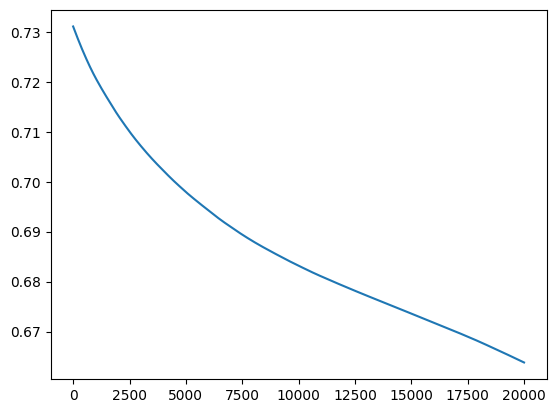

In [26]:
n_x= X_train.shape[0] #input layer
n_h1= 32 #number of nuron in first hidden layer
n_h2=16  #number of nuron in second hidden layer
n_h3=8  #number of nurons in third hidden layer
n_h4=4  #number of nurons in fourth hidden layer
n_o= 1 #number of nurons inoutput layer 


layers_dims = [n_x, n_h1, n_h2, n_h3,n_h4, n_o] #  5-layer model

parameters, costs = ANN(X_train, Y_train, layers_dims,learning_rate = 0.00009, num_iterations = 20000, print_cost = True)



# <b>5. <span style='color:#c72b2ed4'>|</span>Prediction</b> 

In [27]:
pred_train= predict(X_train,Y_train,parameters)
pred_test= predict(X_test,Y_test,parameters)

Accuracy: 0.7180000000000002
Accuracy: 0.7120000000000002


In [28]:
def plot_confusion_matrix(Y, predictions, title='', ax=None, **kwargs):
    """    
    Arguments:
    Y -- True labels 
    predictions -- Predicted labels
    """
    # Accuracy
    acc = np.sum((Y == predictions)) *100/ Y.shape[1]
    
    # Calculate confusion matrix elements
    true_positive = np.sum((predictions == 1) & (Y == 1))
    false_positive = np.sum((predictions == 1) & (Y == 0))
    true_negative = np.sum((predictions == 0) & (Y == 0))
    false_negative = np.sum((predictions == 0) & (Y == 1))
    
    # Create the confusion matrix
    confusion_matrix = np.array([[true_negative, false_positive],
                                 [false_negative, true_positive]])
    
    # Plot the confusion matrix
    ax = ax or plt.gca()
    ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Confusion Matrix: {title}; Accuracy:{acc:.2f}%' )
    cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
    plt.colorbar(cax)
    
    # Add labels to the plot
    classes = ["Negative", "Positive"]
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Fill in the confusion matrix elements
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(confusion_matrix[i, j]), horizontalalignment="center", color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")
    
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    return ax

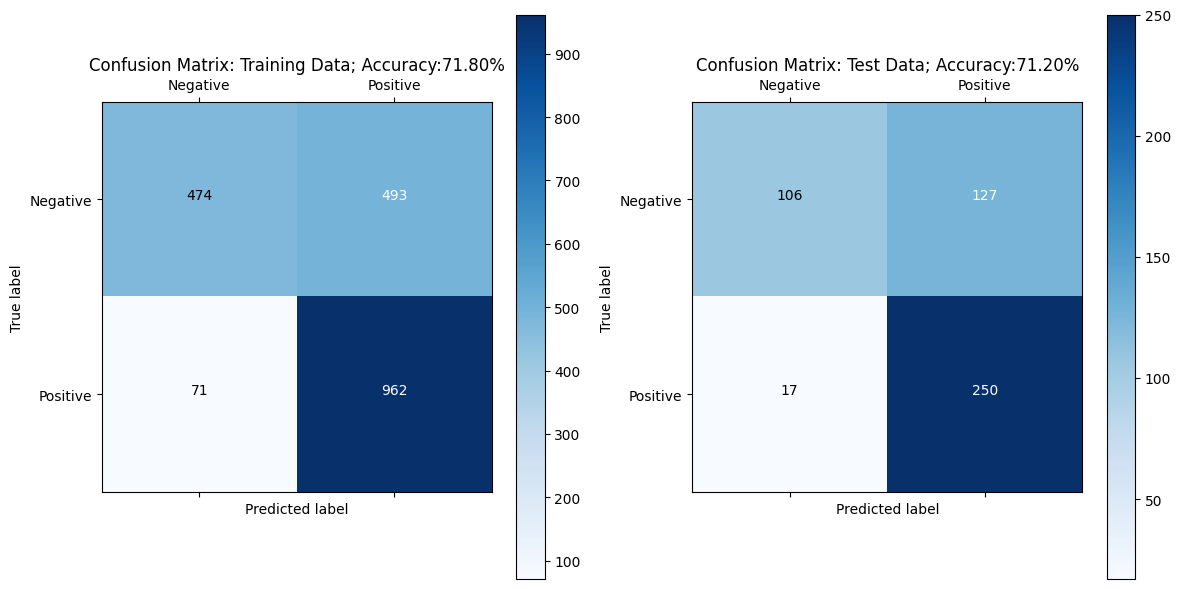

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_confusion_matrix(Y_train, pred_train, title="Training Data", ax=axes[0])
plot_confusion_matrix(Y_test, pred_test, title="Test Data", ax=axes[1])

plt.tight_layout()
plt.show()

# <b>6. <span style='color:#c72b2ed4'>|</span>Trying a different (simple) structured model</b> 


Cost after iteration 0: 0.7173570607520298
Cost after iteration 500: 0.6681221208818721
Cost after iteration 1000: 0.6444682552866946
Cost after iteration 1500: 0.6233449756206229
Cost after iteration 2000: 0.6027845952301952
Cost after iteration 2500: 0.5829007411590285
Cost after iteration 3000: 0.5651622684973712
Cost after iteration 3500: 0.549452760091398
Cost after iteration 4000: 0.535723960827796
Cost after iteration 4500: 0.5237085213969903
Cost after iteration 5000: 0.5131868191568405
Cost after iteration 5500: 0.5037378131598648
Cost after iteration 6000: 0.4951785642955501
Cost after iteration 6500: 0.4872256692813122
Cost after iteration 7000: 0.47982315085382615
Cost after iteration 7500: 0.47313179326300026
Cost after iteration 8000: 0.4670215283797464
Cost after iteration 8500: 0.46133124362042727
Cost after iteration 9000: 0.4559591305847879
Cost after iteration 9500: 0.4509968150282431
Cost after iteration 10000: 0.4462604514573003
Cost after iteration 10500: 0.441816

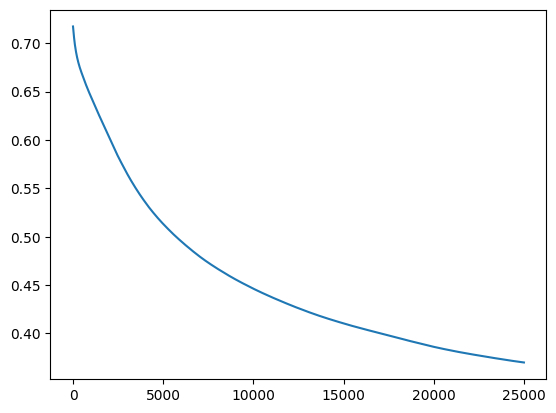

In [30]:
layers_dims=[n_x,6,4,1]
parameters2, costs2 = ANN(X_train, Y_train, layers_dims,learning_rate = 0.00075, num_iterations = 25000, print_cost = True)

In [31]:
pred_train2=predict(X_train,Y_train,parameters2)
pred_test2=predict(X_test,Y_test,parameters2)

Accuracy: 0.8730000000000003
Accuracy: 0.8840000000000002


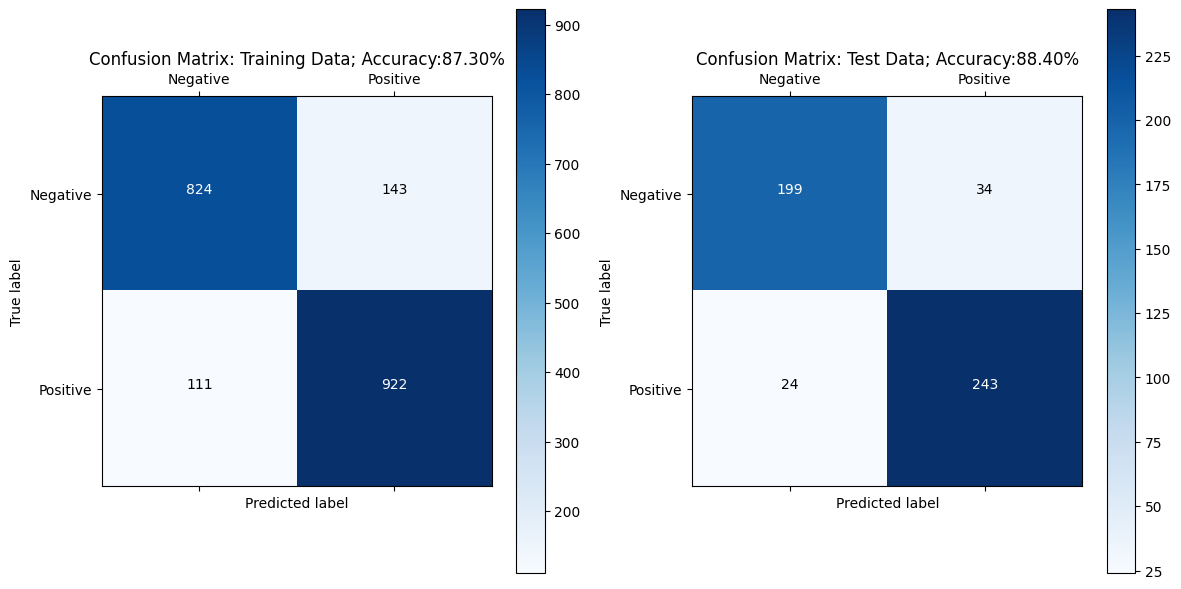

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_confusion_matrix(Y_train, pred_train2, title="Training Data", ax=axes[0])
plot_confusion_matrix(Y_test, pred_test2, title="Test Data", ax=axes[1])

plt.tight_layout()
plt.show()

* **Structure of this ANN model are inspired from this course on <a href="https://www.coursera.org/learn/neural-networks-deep-learning"> Coursera</a>**
* **Please feel free to leave any suggestion and do Upvote if you like the notebook**